
![image](https://storage.googleapis.com/kaggle-datasets-images/4134888/7159329/8685cd8fb7c162e34269921f17687cbe/dataset-cover.jpeg?t=2023-12-09-07-27-45)


# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Introduction</p></div>

This heart disease dataset, sourced from a reputable multispecialty hospital in India, comprises a rich array of information encompassing 14 common features, making it a valuable resource for cardiovascular research. With a cohort of 1000 subjects and 12 distinct features, this dataset serves as a pivotal tool for developing early-stage heart disease detection methods and constructing predictive machine-learning models. Its diverse and comprehensive nature positions it as a significant asset in advancing research endeavors aimed at understanding and mitigating cardiovascular risks.

<h2 style='border:0; border-radius: 15px; font-weight: 150; color:#9b006e; font-size:250%'><center> Cardiovascular Disease Dataset Description
</center></h2>

|S.No|Attribute|Explain|Unit|Type of Data|
|----|---------|-------|----|------------|
|1|**Patient Identification Number**|patientid|Numeric|Number|
|2|**Age**|age|Numeric|In Years|
|3|**Gender**|gender|Binary|0 (female) / 1 (male)|
|4|**Resting blood pressure**|restingBP|Numeric|94-200 (in mm HG)|
|5|**Serum cholesterol**|serumcholestrol|Numeric|126-564 (in mg/dl)|
|6|**Fasting blood sugar**|fastingbloodsugar|Binary|0 (false) / 1 (true) > 120 mg/dl|
|7|**Chest pain type**|chestpain|Nominal|0 (typical angina), 1 (atypical angina), 2 (non-anginal pain), 3 (asymptomatic)|
|8|**Resting electrocardiogram results**|restingelectro|Nominal|0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy)|
|9|**Maximum heart rate achieved**|maxheartrate|Numeric|71-202|
|10|**Exercise induced angina**|exerciseangina|Binary|0 (no) / 1 (yes)|
|11|**Oldpeak = ST**|oldpeak|Numeric|0-6.2|
|12|**Slope of the peak exercise ST segment**|slope|Nominal|1 (upsloping), 2 (flat), 3 (downsloping)|
|13|**Number of major vessels**|noofmajorvessels|Numeric|0, 1, 2, 3|
|14|**Classification (target)**|target|Binary|0 (Absence of Heart Disease), 1 (Presence of Heart Disease)|


# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Import Modules</p></div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

print(colored('\nAll libraries imported succesfully.', 'blue'))


All libraries imported succesfully.


# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Load the Data</p></div>


In [2]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head().style.set_properties(**{'background-color':'blue','color':'white','border-color':'#8b8c8c'})

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.300000,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.700000,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.000000,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.200000,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.300000,3,2,1


# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Data Information</p></div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [4]:
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,5048704.412000,2895904.500488,103368.000000,2536439.500000,4952508.500000,7681877.000000,9990855.000000
age,1000.000000,49.242000,17.864730,20.000000,34.000000,49.000000,64.250000,80.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.980000,0.953157,0.000000,0.000000,1.000000,2.000000,3.000000
restingBP,1000.000000,151.747000,29.965228,94.000000,129.000000,147.000000,181.000000,200.000000
serumcholestrol,1000.000000,311.447000,132.443801,0.000000,235.750000,318.000000,404.250000,602.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.748000,0.770123,0.000000,0.000000,1.000000,1.000000,2.000000
maxheartrate,1000.000000,145.477000,34.190268,71.000000,119.750000,146.000000,175.000000,202.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0">ﮩ٨ـ❤️ﮩ٨ـﮩﮩ<b> </b>Data Preprocessning</p></div>

## Handling Missing Values

In [5]:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [6]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Exploratory Data Analysis (EDA)📊</p></div>


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 1.What is the age range of patients in the dataset?</b></font>

**Answer: Age Range: 20 - 80**

**Explanation: The age range is determined by finding the minimum and maximum age values in the dataset. In this case, patients' ages range from 20 to 80 years.**

In [7]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)


Age Range: 20 - 80


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 2. How many males and females are represented in the dataset?</b></font>

**Answer: Female: 1, Male: 0**


In [8]:
gender_count = df['gender'].value_counts()
print(gender_count)


gender
1    765
0    235
Name: count, dtype: int64


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 3. What is the most common type of chest pain observed in the patients?</b></font>

**Answer: Chest Pain Type 2**

**Explanation: Chest pain type 2 is the most common among the patients, as determined by counting the occurrences in the 'chestpain' column.**


In [9]:
chest_pain_counts = df['chestpain'].value_counts()
print(chest_pain_counts)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


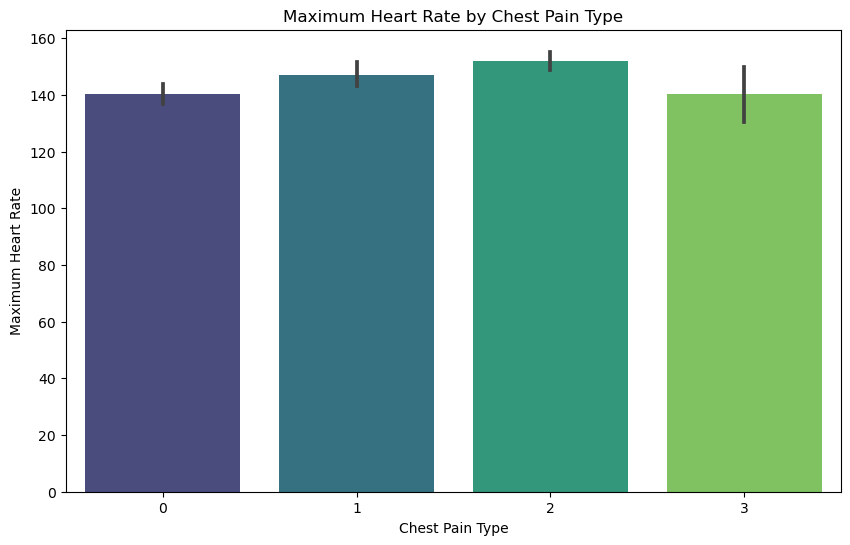

In [10]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 4. What is the average resting blood pressure among the patients?</b></font>

**Answer: Average Resting Blood Pressure: 151.75 mm Hg**

**Explanation: The average resting blood pressure is calculated by taking the mean of the values in the 'restingBP' column.**


In [11]:
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")


Average Resting Blood Pressure: 151.75 mm Hg


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 5. How does serum cholesterol vary across different patients?</b></font>

**Explanation: Serum cholesterol distribution is visualized using a boxplot, providing insights into the spread and central tendency of cholesterol levels among patients.**


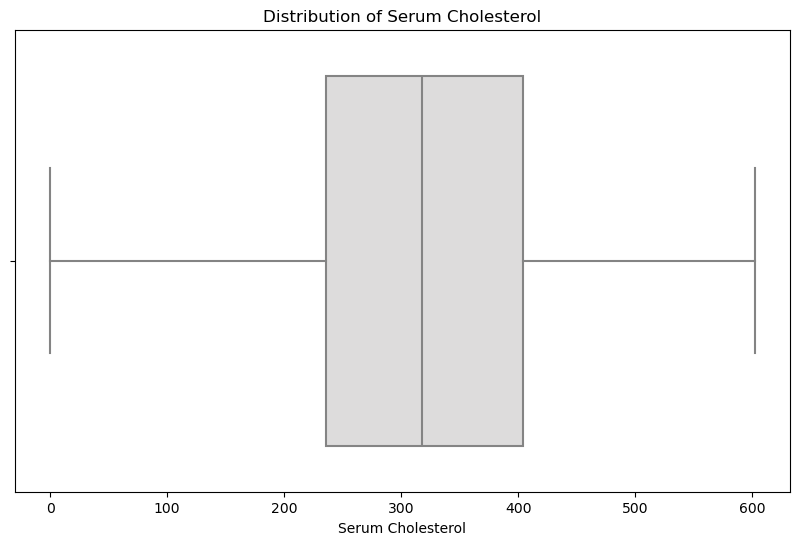

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 6. What percentage of patients have fasting blood sugar greater than 120 mg/dl? </b></font>

**Answer: Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%**

**Explanation: The percentage is calculated by dividing the number of patients with fasting blood sugar greater than 120 mg/dl by the total number of patients.**


In [13]:
percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")


Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 7. What are the predominant resting electrocardiogram results in the dataset?</b></font>

**Answer: Normal (0): 2, Abnormality (1): 3**

**Explanation: The counts of normal and abnormal resting electrocardiogram results are determined from the 'restingrelectro' column.**


In [14]:
resting_electro_counts = df['restingrelectro'].value_counts()
print(resting_electro_counts)


restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64


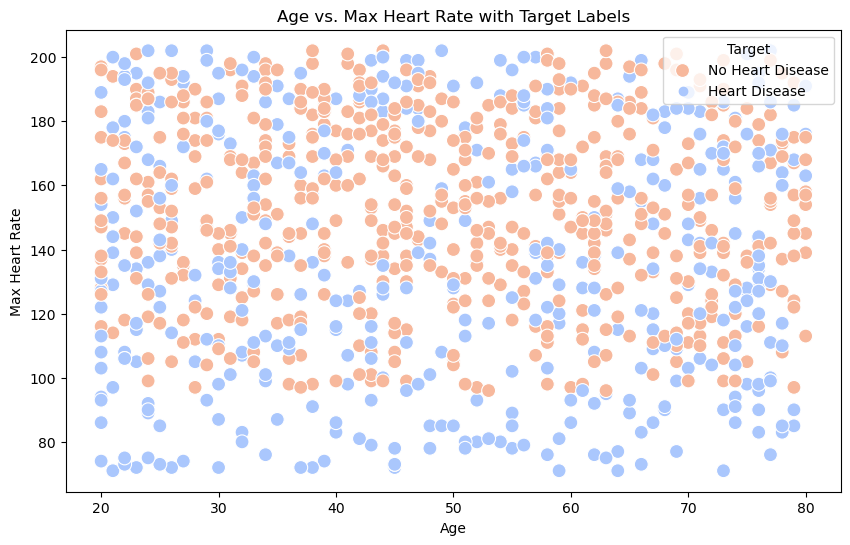

In [15]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='maxheartrate', hue='target', data=df, palette='coolwarm', s=100)
plt.title('Age vs. Max Heart Rate with Target Labels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 8. What is the average maximum heart rate achieved by the patients on average?</b></font>

**Answer: Average Maximum Heart Rate: 145.48**

**Explanation: The average maximum heart rate is calculated by taking the mean of values in the 'maxheartrate' column.**


In [16]:
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")


Average Maximum Heart Rate: 145.48


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 9. How many patients experienced exercise-induced angina?</b></font>

**Answer: Number of Patients with Exercise-Induced Angina: 498**

**Explanation: The count of patients with exercise-induced angina is obtained from the 'exerciseangia' column.**


In [17]:
exercise_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")


Number of Patients with Exercise-Induced Angina: 498


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 10. What is the average oldpeak (ST depression induced by exercise relative to rest) among the patients?</b></font>

**Answer: Average Oldpeak: 2.71**

**Explanation: The average oldpeak is calculated by taking the mean of values in the 'oldpeak' column.**

In [18]:
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")


Average Oldpeak: 2.71


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 11. How is the slope of the peak exercise ST segment distributed in the dataset?</b></font>

**Explanation: The distribution of the slope is visualized using a countplot, showing the frequency of each slope type in the 'slope' column.**


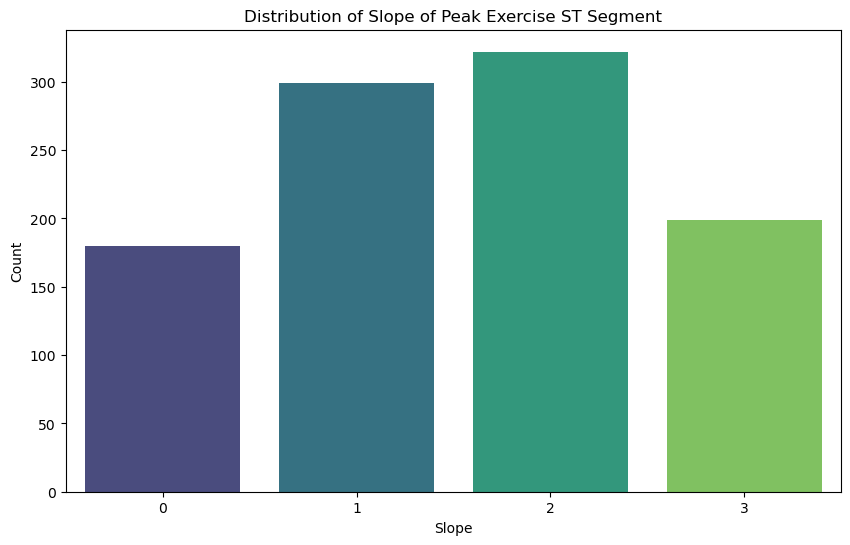

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 12. What is the range of the number of major vessels in the patients?</b></font>

**Answer: Number of Major Vessels Range: 0 - 3**

**Explanation: The range is determined by finding the minimum and maximum values in the 'noofmajorvessels' column.**


In [20]:
vessels_range = f"Number of Major Vessels Range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}"
print(vessels_range)


Number of Major Vessels Range: 0 - 3


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 13. What percentage of patients in the dataset have heart disease (target = 1)?</b></font>

**Answer: Percentage of Patients with Heart Disease: 58.00%**

**Explanation: The percentage is calculated by dividing the number of patients with heart disease (target = 1) by the total number of patients.**

In [21]:
percentage_heart_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")


Percentage of Patients with Heart Disease: 58.00%


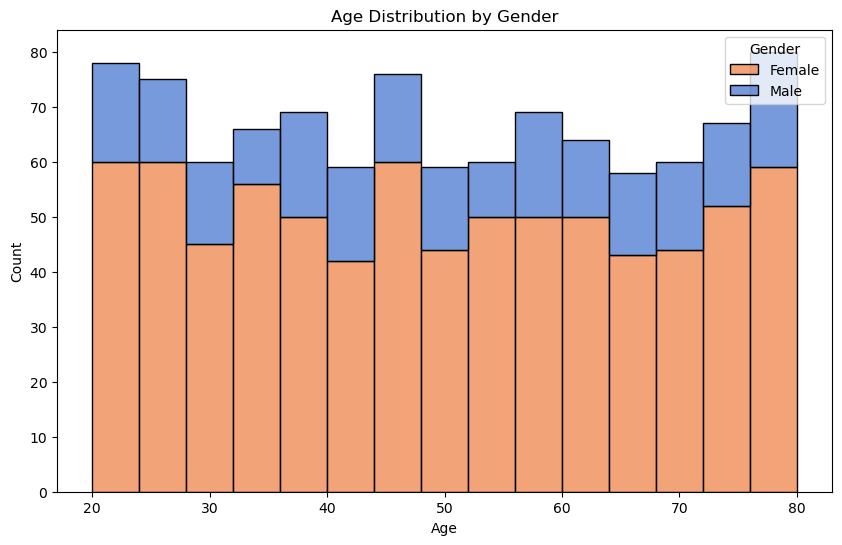

In [22]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='gender', data=df, palette='muted', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 14. Can you identify the patient with the highest age in the dataset?</b></font>

**Answer:**
* Patient ID: 1160678
* Age: 80
* Gender: Female
* Chest Pain: 1
* Target: 1 (Heart Disease)

**Explanation: The patient with the highest age is identified by finding the maximum value in the 'age' column and extracting other details.**

In [23]:
oldest_patient = df.loc[df['age'].idxmax()]
print(f"Details of the Oldest Patient:\n{oldest_patient}")


Details of the Oldest Patient:
patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 15. Who is the patient with the lowest resting blood pressure?</b></font>

**Answer:**
* Patient ID: 119250
* Age: 40
* Gender: Female
* Chest Pain: 0
* Target: 0 (No Heart Disease)

**Explanation: The patient with the lowest resting blood pressure is identified by finding the minimum value in the 'restingBP' column and extracting other details.**


In [24]:
lowest_bp_patient = df.loc[df['restingBP'].idxmin()]
print(f"Details of the Patient with the Lowest Resting Blood Pressure:\n{lowest_bp_patient}")


Details of the Patient with the Lowest Resting Blood Pressure:
patientid            119250.0
age                      40.0
gender                    1.0
chestpain                 0.0
restingBP                94.0
serumcholestrol         229.0
fastingbloodsugar         0.0
restingrelectro           1.0
maxheartrate            115.0
exerciseangia             0.0
oldpeak                   3.7
slope                     1.0
noofmajorvessels          1.0
target                    0.0
Name: 1, dtype: float64


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 16. What is the correlation between age and maximum heart rate?</b></font>

**Answer: Correlation between Age and Maximum Heart Rate: -0.04**

**Explanation: The correlation coefficient is calculated to quantify the relationship between age and maximum heart rate.**


In [25]:
correlation_age_maxheartrate = df['age'].corr(df['maxheartrate'])
print(f"Correlation between Age and Maximum Heart Rate: {correlation_age_maxheartrate:.2f}")


Correlation between Age and Maximum Heart Rate: -0.04


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 17. Is there a relationship between chest pain type and the presence of heart disease?</b></font>

**Explanation: The relationship is visualized using a countplot, showing the distribution of heart disease presence for each chest pain type.**


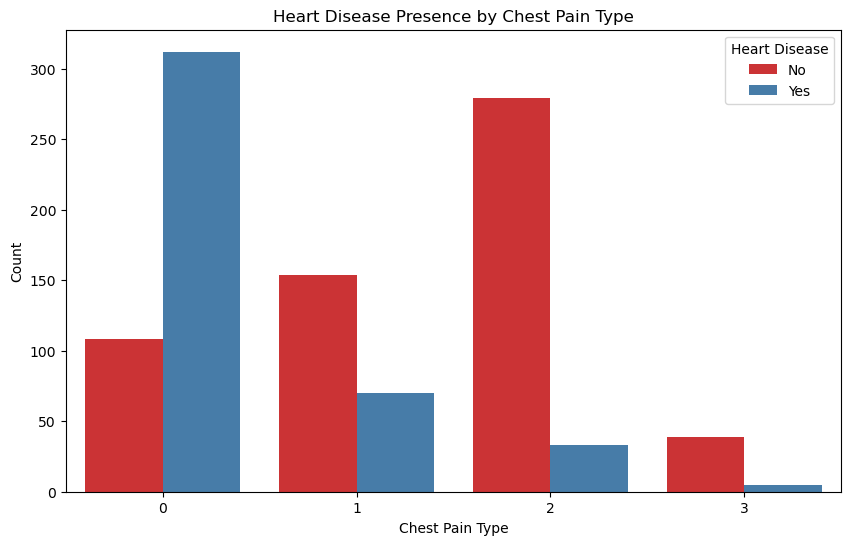

In [26]:
# Convertir los valores en la columna 'target' a cadenas 'No' y 'Yes'
df['target'] = df['target'].map({0: 'No', 1: 'Yes'})

# Graficar el countplot con la leyenda personalizada
plt.figure(figsize=(10, 6))
sns.countplot(x='chestpain', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 18. How does serum cholesterol differ between patients with and without heart disease?</b></font>

**Explanation: The difference in serum cholesterol levels is visualized using a boxplot, comparing patients with and without heart disease.**


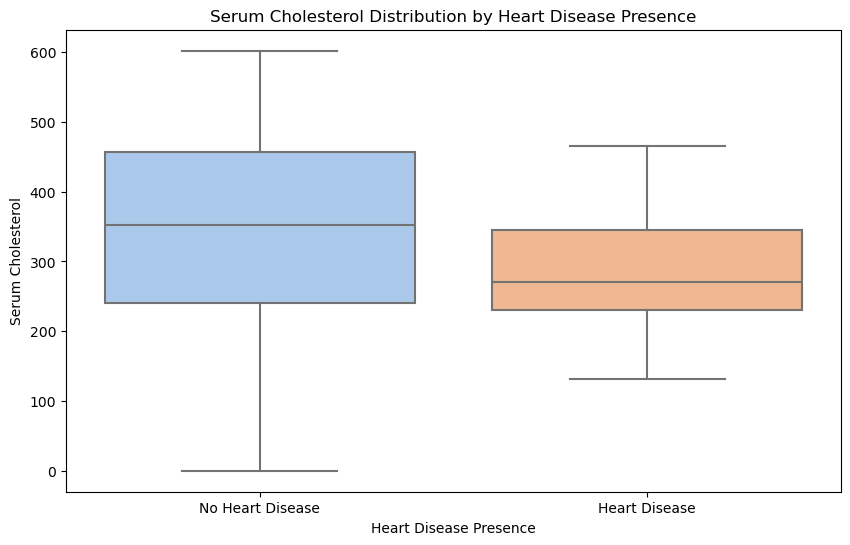

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholesterol')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color:#717171; font-size: 100%; text-align: left;">
    
<font size="+1" color="#059c99"><b>💞 20. How many patients have all three major vessels showing defects?</b></font>

**Answer: Number of Patients with Defects in All Three Major Vessels: 116**

**Explanation: The count of patients with defects in all three major vessels is obtained from the 'noofmajorvessels' column.**

In [29]:
defects_count = len(df[df['noofmajorvessels'] == 3])
print(f"Number of Patients with Defects in All Three Major Vessels: {defects_count}")


Number of Patients with Defects in All Three Major Vessels: 116


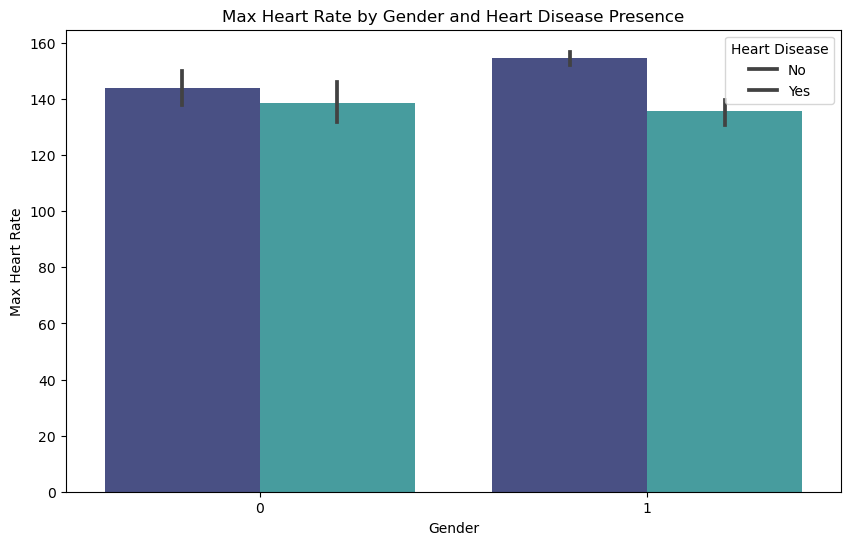

In [30]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='maxheartrate', hue='target', data=df, palette='mako')
plt.title('Max Heart Rate by Gender and Heart Disease Presence')
plt.xlabel('Gender')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Target Categorizing</p></div>

In [31]:
# target classes :
df.target.unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df = df.replace({'target' : {
                                    0 : 'Absence of Heart Disease',
                                    1 : 'Presence of Heart Disease',
        }}
)

In [33]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,Yes
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,No
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,No
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,Yes
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,Yes


 # <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Normalization</p></div>
 

In [34]:
# Create X from DataFrame and y as Target
X_disease = df.drop(columns='target')
y = df.target

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)
X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe().T.style.background_gradient(axis=0, cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,0.500161,0.292886,0.000000,0.246076,0.490432,0.766475,1.000000
age,1000.000000,0.487367,0.297746,0.000000,0.233333,0.483333,0.737500,1.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.326667,0.317719,0.000000,0.000000,0.333333,0.666667,1.000000
restingBP,1000.000000,0.544783,0.282691,0.000000,0.330189,0.500000,0.820755,1.000000
serumcholestrol,1000.000000,0.517354,0.220006,0.000000,0.391611,0.528239,0.671512,1.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.374000,0.385061,0.000000,0.000000,0.500000,0.500000,1.000000
maxheartrate,1000.000000,0.568527,0.260994,0.000000,0.372137,0.572519,0.793893,1.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Modelling</p></div>


### Initialization

In [36]:
# Define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="plasma")
    ax.set_xlabel('Predicted labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    plt.show()

In [37]:
# Define a function to ploting Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [38]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="plasma", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax[0].yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [39]:
df.target.value_counts()

target
Yes    580
No     420
Name: count, dtype: int64

In [40]:
# Splite Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>RandomForestClassifier</p></div>


In [41]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 500}
accuracy :  0.9800497866287339


In [42]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [43]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.98


In [44]:
y_test.value_counts()

target
Yes    132
No     118
Name: count, dtype: int64

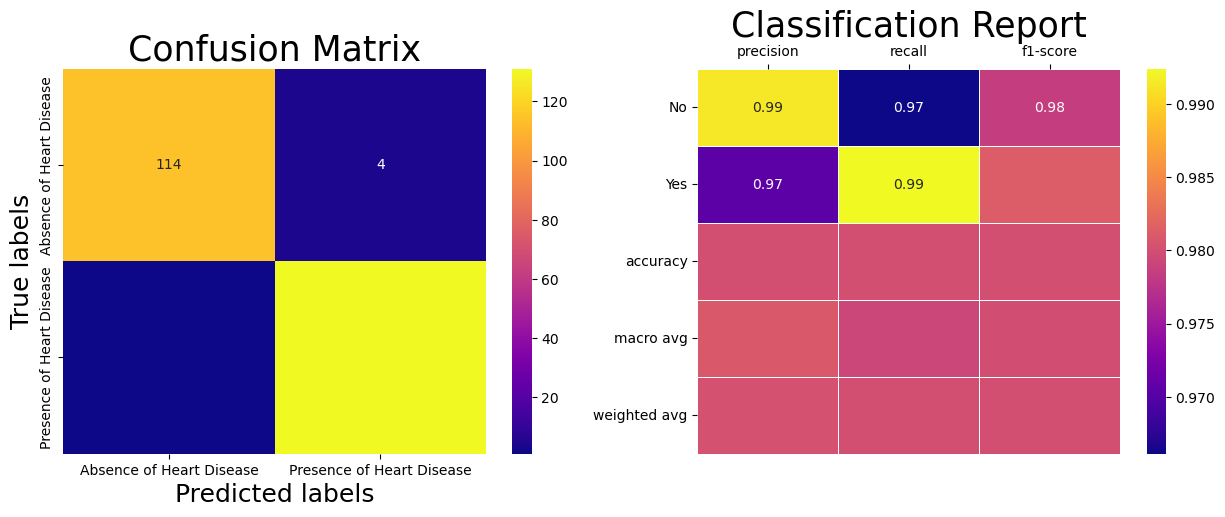

In [45]:
clf_plot(y_pred_rf)

# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>LogisticRegression</p></div>


In [46]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}
accuracy :  0.96


In [47]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [48]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.976


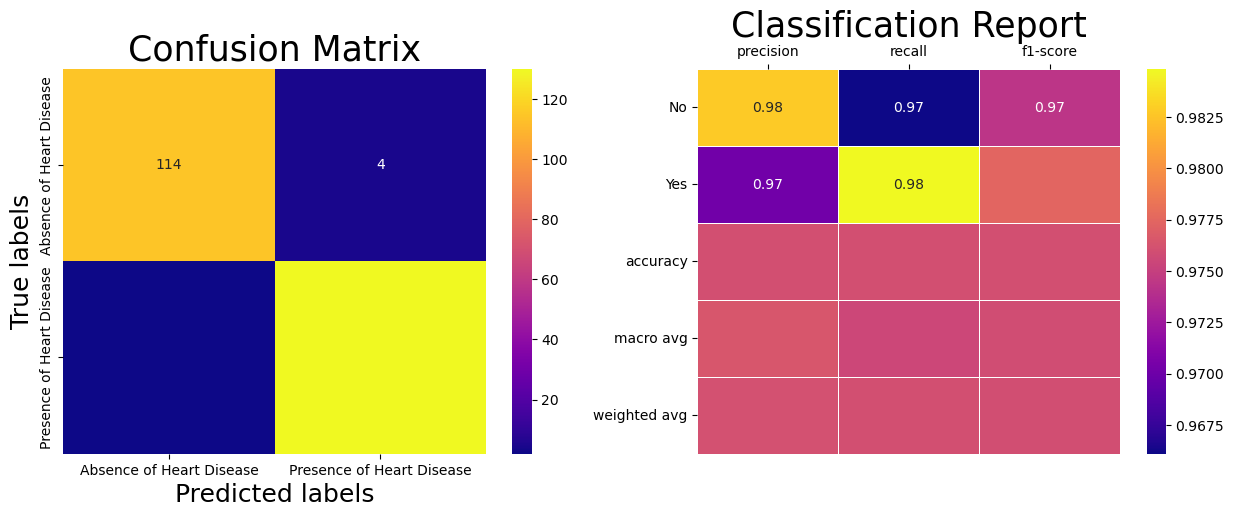

In [49]:
clf_plot(y_pred_lr)

# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>SVC</p></div>

In [50]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 0.1}
accuracy :  0.9626666666666667


In [51]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [52]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.968


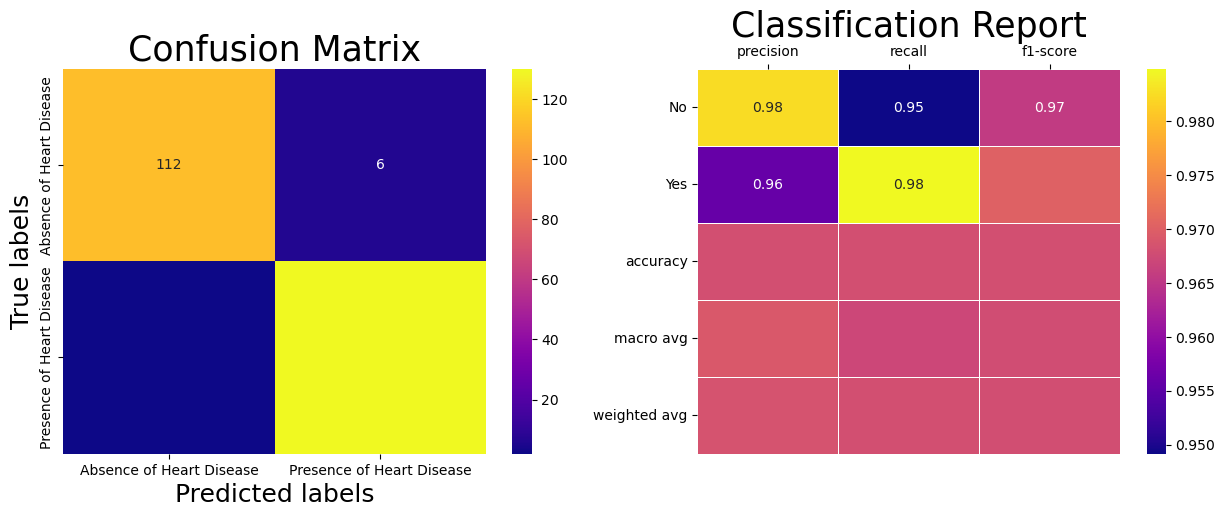

In [53]:
clf_plot(y_pred_svc)

# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>DecisionTreeClassifier</p></div>

In [54]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)


print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_depth': 12, 'splitter': 'random'}
accuracy :  0.9720000000000001


In [55]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [56]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.956


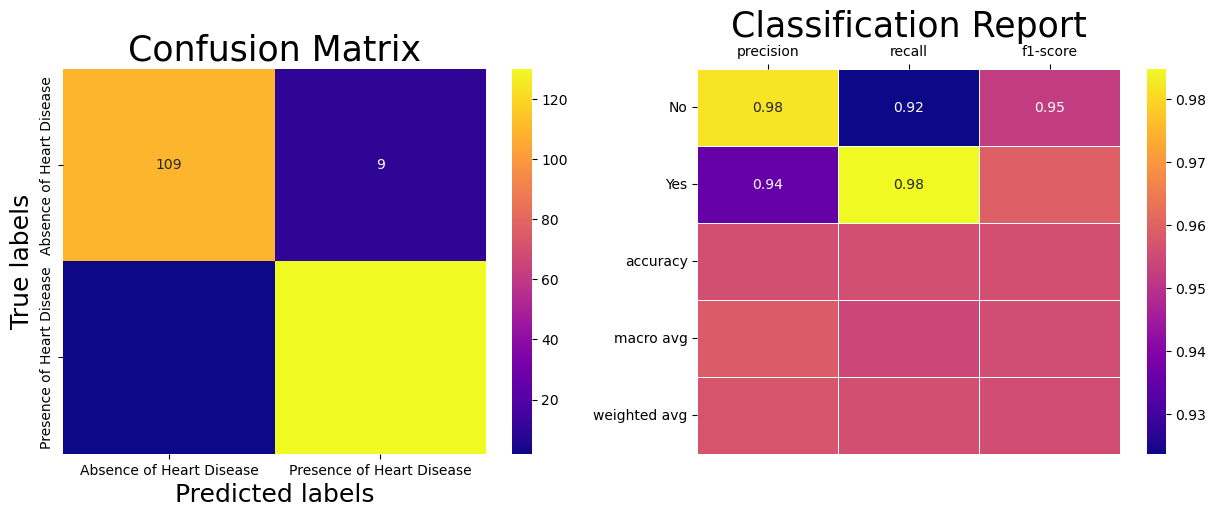

In [57]:
clf_plot(y_pred_tree)

# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>KNeighborsClassifier</p></div>

In [58]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
accuracy :  0.9479999999999998


In [59]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [60]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.96


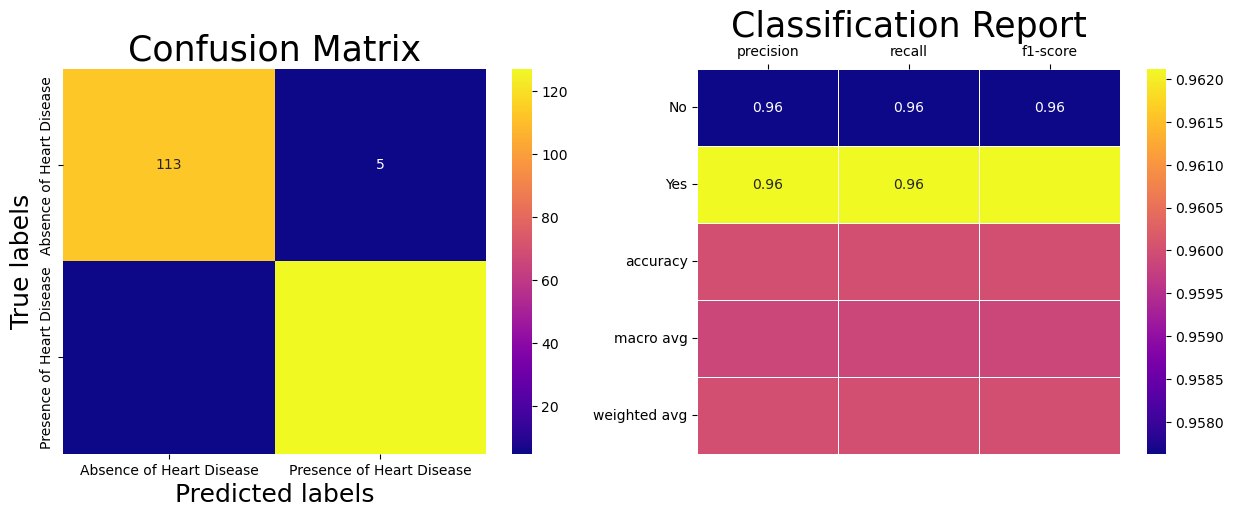

In [61]:
clf_plot(y_pred_knn)

# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>GaussianNB</p></div>



In [62]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

GNB Score : 0.948


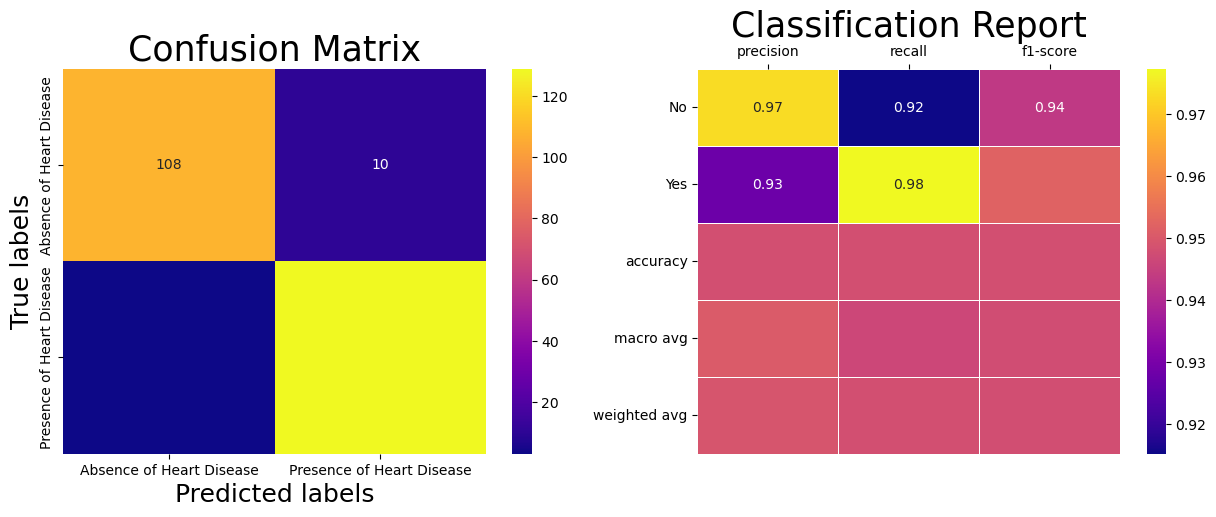

In [63]:
clf_plot(y_pred_gnb)

# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Result</p></div>

In [64]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)

In [65]:
sns.set_palette("plasma")

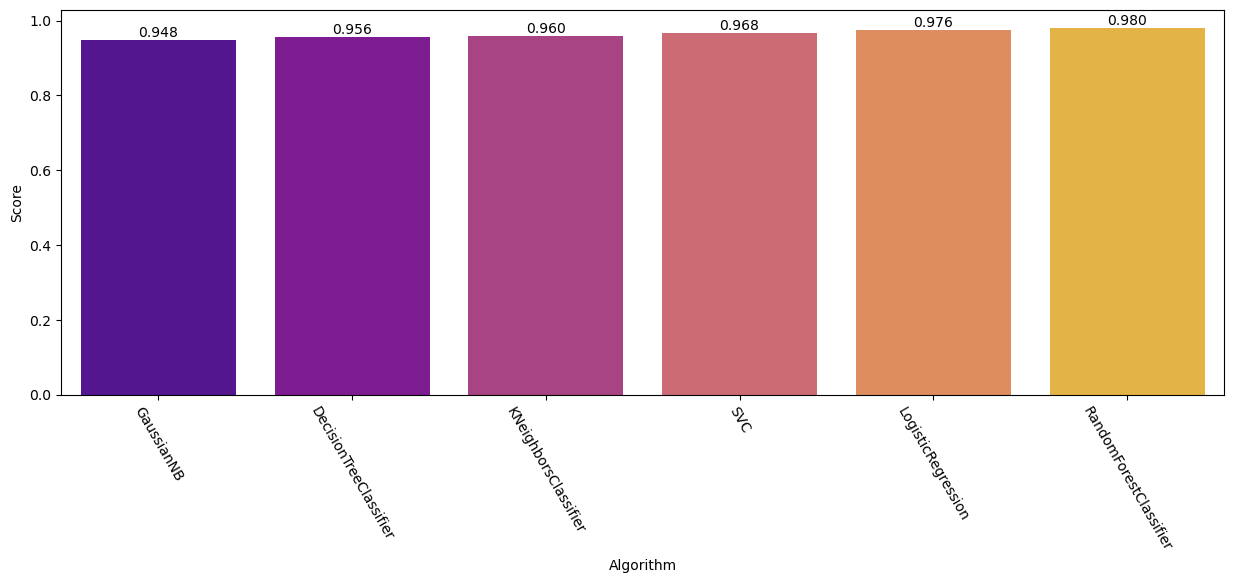

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

## Results :

### Based on the above plots, best algorithm base on Score is : Random Forest Classifier


# <div style="color:white;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/fyD3nrX4/cardiovas-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b>ﮩ٨ـ❤️ﮩ٨ـﮩﮩ</b>Final Modeling</p></div>


In [67]:
# Model
rf = RandomForestClassifier(**rf_cv.best_params_)

In [68]:
rf.fit(X, y)

RandomForestClassifier(criterion='log_loss', n_estimators=500)

<div class="alert alert-block alert-info"> "Your positive feedback and upvotes are incredibly appreciated! They inspire me to create more valuable content and help others in their learning journey. Your support fosters a vibrant community of knowledge-sharing. Thank you for considering an upvote, and best wishes on your learning journey!" 😊📌</div>